# Time Series Analysis and Forecasting - Sai Teja Burla

- Batch - B
- Group Number - 5
- Task 2.4

## Import Libraries

In [1]:
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Import and Cleaning

In [3]:
df = pd.read_csv("Store.csv", encoding='latin')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City_Code,State_Code,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,11-09-2013,11-12-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,C259,S16,42420,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,11-09-2013,11-12-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,C259,S16,42420,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,6/13/2013,6/17/2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,C64,S04,90036,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,10-11-2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,C150,S09,33311,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,10-11-2012,10/18/2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,C150,S09,33311,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Extracting columns we need for time series analysis and converting Order_Date column to datetime format.

In [4]:
timeSeriesDF = df[['Order Date','Sales']]
timeSeriesDF.columns = timeSeriesDF.columns.str.replace(' ','_')
timeSeriesDF['Order_Date'] = timeSeriesDF['Order_Date'].str.replace('-','/') 
timeSeriesDF['Order_Date'] = pd.to_datetime(timeSeriesDF['Order_Date'])
timeSeriesDF.head()

,Order_Date,Sales
0,2013-11-09,261.9600
1,2013-11-09,731.9400
2,2013-06-13,14.6200
3,2012-10-11,957.5775
4,2012-10-11,22.3680


In [5]:
timeSeriesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_Date  9994 non-null   datetime64[ns]
 1   Sales       9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


In [6]:
timeSeriesDF.describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


Missing values and outlier checking and treatment.

In [7]:
timeSeriesDF.isnull().sum()

Order_Date    0
Sales         0
dtype: int64

No null values so no additional treatment needed.

### Sales Related Cleaning

<AxesSubplot:xlabel='Sales'>

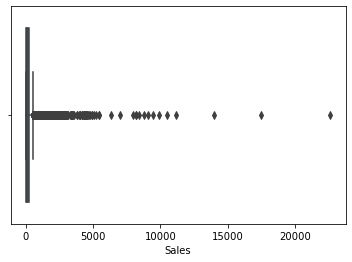

In [8]:
sns.boxplot(timeSeriesDF['Sales'])

In [9]:
q1 = np.percentile(timeSeriesDF['Sales'], 25, interpolation = 'midpoint')
q3 = np.percentile(timeSeriesDF['Sales'], 75, interpolation = 'midpoint')
iqr = q3-q1

In [10]:
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
print("Upper Bound Value: ", upper)
print("Lower Bound Value: ", lower)

Upper Bound Value:  498.93
Lower Bound Value:  -271.71000000000004


In [11]:
upper = timeSeriesDF['Sales'] >= (q3+1.5*iqr)
print("Upper Bound: ", upper)
print(np.where(upper))

Upper Bound:  0       False
1        True
2       False
3        True
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Sales, Length: 9994, dtype: bool
(array([   1,    3,    7, ..., 9947, 9948, 9968], dtype=int64),)


In [12]:
lower = timeSeriesDF['Sales'] <= (q1-1.5*iqr)
print("Lower Bound: ", lower)
print(np.where(lower))

Lower Bound:  0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Name: Sales, Length: 9994, dtype: bool
(array([], dtype=int64),)


As we can see above we have many values that are going far beyond the upper bound but not one going below lower bound. So next we cap the values to the value of the 90th percentile in the data as a fix.

In [13]:
ninp = np.percentile(timeSeriesDF['Sales'], 90)
timeSeriesDF['Sales'] = np.where(timeSeriesDF['Sales']>ninp, ninp, timeSeriesDF['Sales'])

<AxesSubplot:xlabel='Sales'>

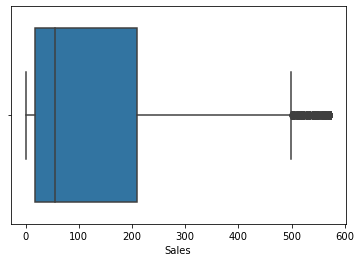

In [14]:
sns.boxplot(timeSeriesDF['Sales'])

As we can see the outliers are almost really close to the other data so we can move forward.

### Date Related Cleaning

Sorting the data on Order_Date in ascending order.

In [15]:
timeSeriesDF = timeSeriesDF.sort_values(by = "Order_Date")
timeSeriesDF.head(20)

,Order_Date,Sales
7980,2011-01-04,16.448
739,2011-01-05,11.784
740,2011-01-05,272.736
741,2011-01-05,3.540
1759,2011-01-06,19.536
7476,2011-01-07,5.480
7474,2011-01-07,572.706
7475,2011-01-07,572.706
7180,2011-01-07,12.780
7477,2011-01-07,391.980


Aggregating the data for each day to see if we can use it for our model.

In [16]:
timeSeriesDF.index = timeSeriesDF.Order_Date 
timeSeriesDF = timeSeriesDF.resample('D').sum()

In [17]:
timeSeriesDF

,Sales
Order_Date,
2011-01-04,16.4480
2011-01-05,288.0600
2011-01-06,19.5360
2011-01-07,2185.4580
2011-01-08,87.1580
...,...
2014-12-27,636.6200
2014-12-28,177.6360
2014-12-29,1504.2168


<AxesSubplot:title={'center':'Daily Sales'}, xlabel='Order_Date'>

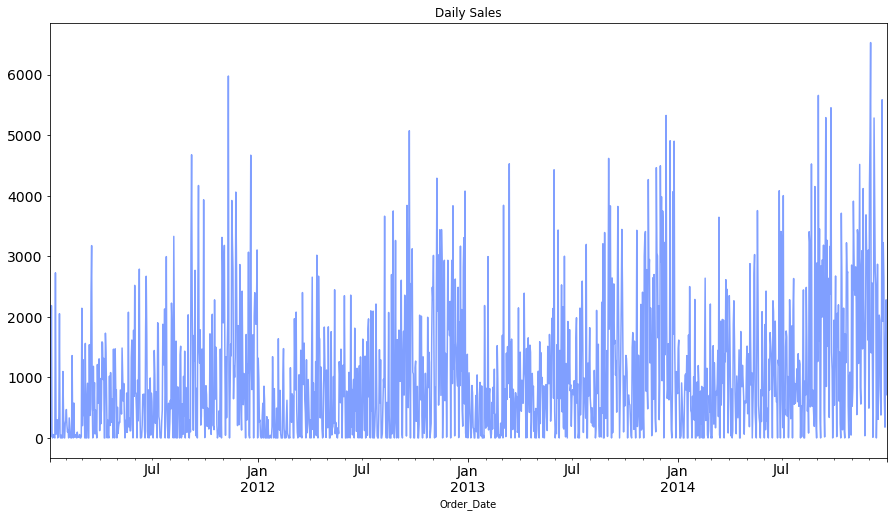

In [18]:
timeSeriesDF.Sales.plot(figsize=(15,8), title= 'Daily Sales', fontsize=14, color='#809fff')

Seeing the graph above we might have to aggregate our data into either weeks or months for making it useful for the model.

## Splitting Data into Test and Train

We split the data into train and test by dividing data based on date. We are going to use the data from January 2011 to June 2014 for train and July 2014 to December 2014 for test. We are also going to aggregate data based on months for using in our models.

In [19]:
train = timeSeriesDF['2011-01-04':'2014-06-30']
test = timeSeriesDF['2014-07-01':]

In [20]:
train = train.resample('M').sum()
train.to_csv('tSTrain.csv')
train

,Sales
Order_Date,
2011-01-31,10274.9510
2011-02-28,4127.0440
2011-03-31,23906.6560
2011-04-30,19937.9230
2011-05-31,17323.6010
2011-06-30,22346.2346
2011-07-31,21725.1150
2011-08-31,21955.2065
2011-09-30,40155.5168


In [21]:
test = test.resample('M').sum()
test.to_csv('tSTest.csv')
test

,Sales
Order_Date,
2014-07-31,35732.3520
2014-08-31,34269.5440
2014-09-30,63690.9900
2014-10-31,41701.6502
2014-11-30,67037.9140
2014-12-31,67413.7548


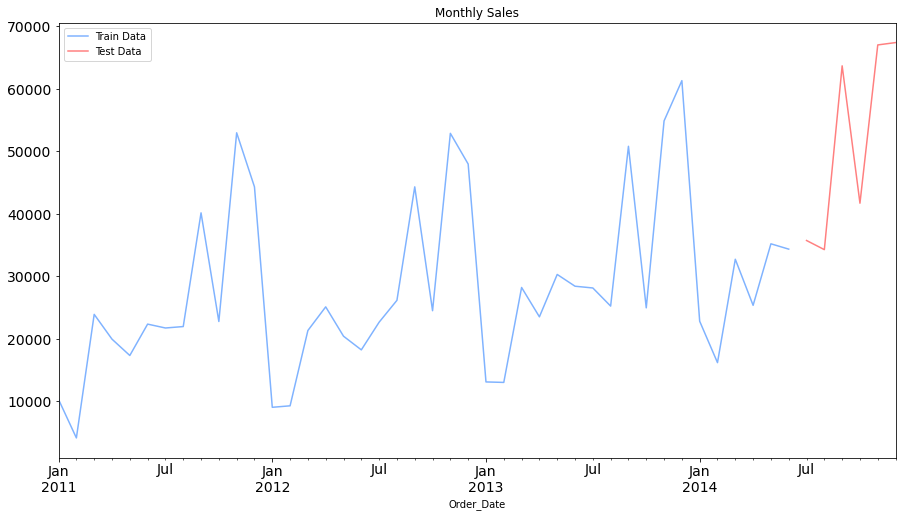

In [22]:
train.Sales.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14, color='#80b3ff', label='Train Data')
test.Sales.plot(figsize=(15,8), title= 'Monthly Sales', fontsize=14, color='#ff8080', label='Test Data')
plt.legend(loc='best')
plt.show()

As we visualise our test and train data we can now see a clear pattern on it which makes it easier to check if our forecasting model is working well through visualizations. Next step would be to check if our data is stationary or not as all the time series model require the data to be stationary.

### Checking Stationarity of Data

In [23]:
frames =[train, test]
newdf = pd.concat(frames)

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
test_result = adfuller(newdf['Sales'])

- Hypothesis for testing if the data is stationary:
    1. h1: Data is stationary
    2. h0: Data is not stationary

In [26]:
def adfuller_test(sales):
    res = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#lags used', 'Number of observations used']
    for value, label in zip(res,labels):
        print(label+' : '+str(value))
    if res[1] <= 0.05:
        print("Strong evidence against the null hypothesis, reject the null hypothesis.")
    else:
        print("Weak evidence against the null hypothesis, accept the null hypothesis.")

In [27]:
adfuller_test(newdf['Sales'])

ADF Test Statistic : -3.991592286193093
p-value : 0.001455182063142433
#lags used : 0
Number of observations used : 47
Strong evidence against the null hypothesis, reject the null hypothesis.


As we can see in the result above the null hypothesis was rejected which means that we can conclude that the data we have at hand is stationary and we can therefore carry forward and use it for our model building and avoid the step for differentiation.

## Different Forecasting Methods

In the following section we are going to experiment and build various models for forecasting data of future. 
- The metric we are going to use for comparison of each model would be the RMSE value.
- Each model built will have a breief explanation right after its heading for easier understanding of what is happening.
- Each model built will have a line graph showing us how the model is doing on the test data for us to visualize it and understand the model better.

### Naive Method

If we have data that is stable throughout it’s time period, we can forecast the price for the next day/week/month by simply taking the last day value and estimate the same value for the next day. This type of  forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.

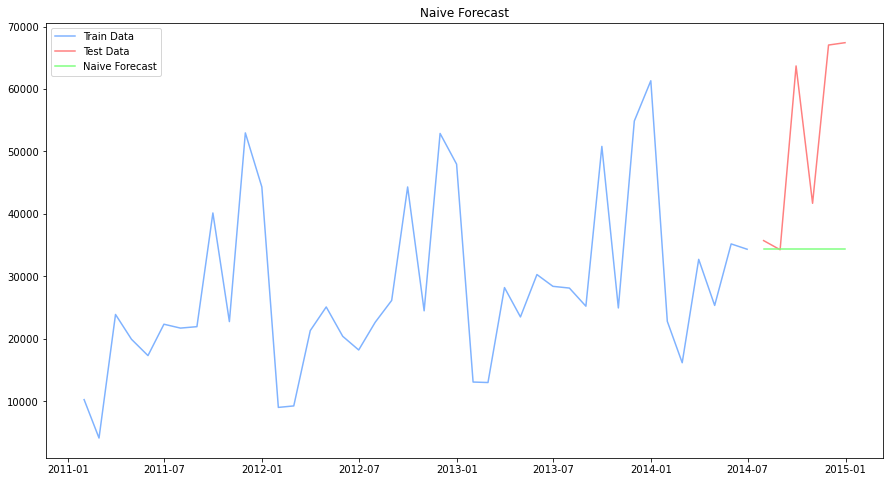

In [28]:
naiveArr = np.asarray(train.Sales)
y_forecast_naive = test.copy()
y_forecast_naive['naive'] = naiveArr[len(naiveArr)-1]
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_naive.index,y_forecast_naive['naive'], color='#80ff80', label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1 = sqrt(mean_squared_error(test.Sales, y_forecast_naive.naive))
print("The root mean squared error for Naive Forecast is: ",rmse1)

The root mean squared error for Naive Forecast is:  22652.087438060003


### Simple Average

If we have data that varies by a small margin throughout it’s time period, but the average at each time period remains constant, we can forecast the price of the next day/week/month somewhere similar to the average of all the past days. This type of forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.

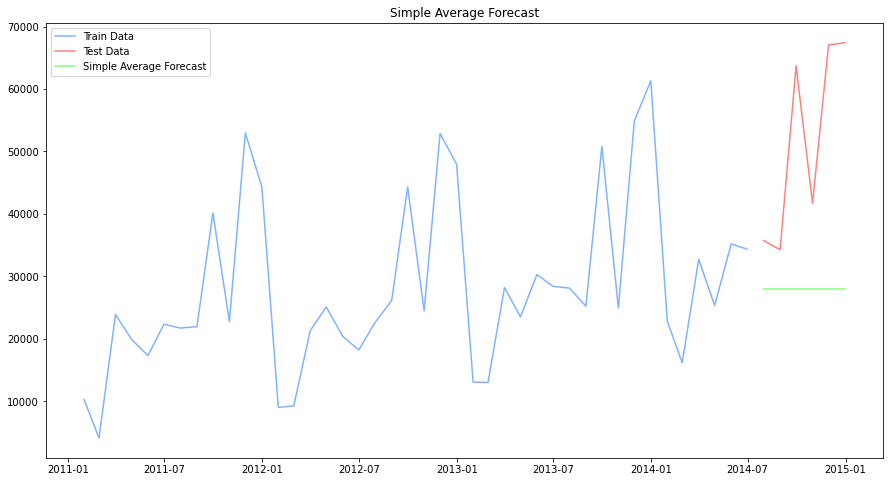

In [30]:
y_forecast_simavg = test.copy()
y_forecast_simavg['simpleavg'] = train['Sales'].mean()
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_simavg.index,y_forecast_simavg['simpleavg'], color='#80ff80', label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.show()

In [31]:
rmse2 = sqrt(mean_squared_error(test.Sales, y_forecast_simavg.simpleavg))
print("The root mean squared error for Simple Average Forecast is: ",rmse2)

The root mean squared error for Simple Average Forecast is:  27881.731070943864


### Moving Average

If we have data in which the prices/sales of the object increased/decreased sharply some time periods ago. In order to use the  previous Average method, we have to use the mean of all the previous data, but using all the previous data doesn’t sound right. Using the prices of the initial period would highly affect the forecast for the next period. Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. Obviously the thinking here is that only the recent values matter. This type of forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

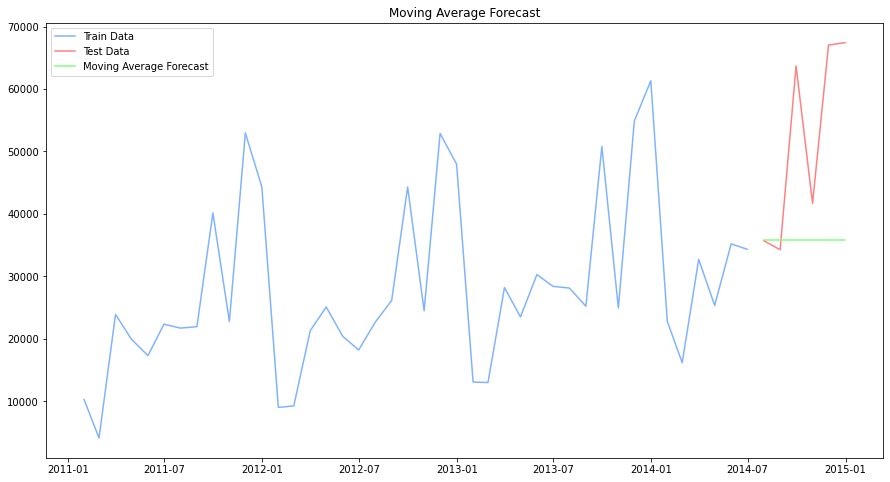

In [32]:
y_forecast_movavg = test.copy()
y_forecast_movavg['movingavg'] = train['Sales'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_movavg.index,y_forecast_movavg['movingavg'], color='#80ff80', label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.show()

In [33]:
rmse3 = sqrt(mean_squared_error(test.Sales, y_forecast_movavg.movingavg))
print("The root mean squared error for Moving Average Forecast is: ",rmse3)

The root mean squared error for Moving Average Forecast is:  21522.676243218528


### Weighted Moving Average

This technique is similar to moving average but while forecasting this method assigns a heavier weight to more current data points since they are more relevant than data points in the distant past.

In [34]:
def wma(weights):
    def calc(x):
        return (weights * x).mean()
    return calc

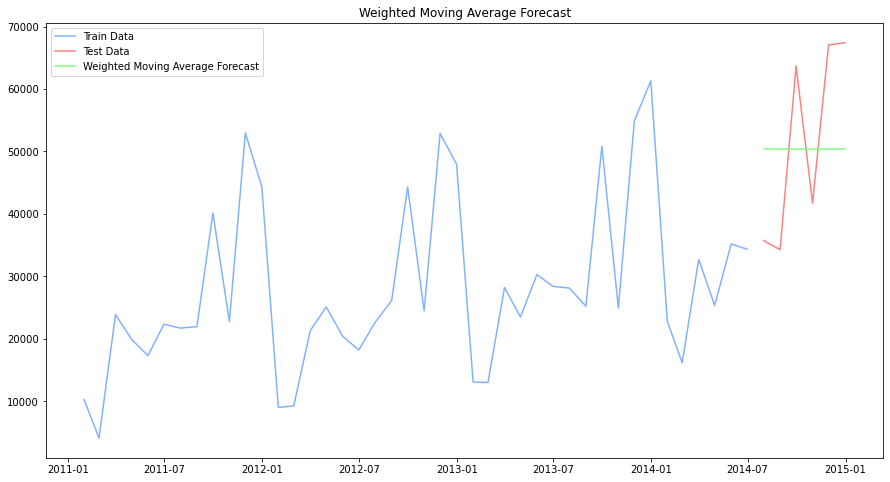

In [35]:
y_forecast_wmovavg = test.copy()
y_forecast_wmovavg['weimovingavg'] = train['Sales'].rolling(3).apply(wma(np.array([0.5,1.5,2.5]))).iloc[-1]
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_wmovavg.index,y_forecast_wmovavg['weimovingavg'], color='#80ff80', label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Forecast")
plt.show()

In [36]:
rmse4 = sqrt(mean_squared_error(test.Sales, y_forecast_wmovavg.weimovingavg))
print("The root mean squared error for Weighted Moving Average Forecast is: ",rmse4)

The root mean squared error for Weighted Moving Average Forecast is:  14681.000722123013


### Exponential Smoothing

After experimenting with the above methods, we can note that both Simple average and Weighted moving average lie on completely opposite ends. We would need something between these two extremes approaches which takes into account all the data while weighing the data points differently. For example it may be sensible to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations

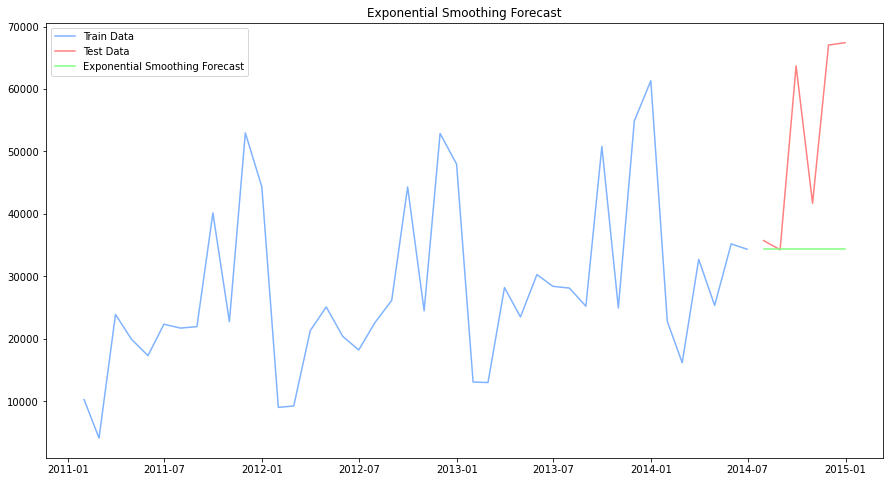

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_forecast_exsmooth = test.copy()
fit1 = SimpleExpSmoothing(np.asarray(train['Sales'])).fit(smoothing_level=0.95,optimized=False)
y_forecast_exsmooth['ES'] = fit1.forecast(len(test))
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_exsmooth.index,y_forecast_exsmooth['ES'], color='#80ff80', label='Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title("Exponential Smoothing Forecast")
plt.show()

In [38]:
rmse5 = sqrt(mean_squared_error(test.Sales, y_forecast_exsmooth.ES))
print("The root mean squared error for Exponential Smoothing Forecast is: ",rmse5)

The root mean squared error for Exponential Smoothing Forecast is:  22637.73861247026


### Holt Linear Method

If we use any of the above methods, it won’t take into account the trend of the data or its seasonality if it exists. Trend is the general pattern of sales that we observe over a period of time. In this case we can see that there is an increasing trend.
Although each one of these methods can be applied to the trend as well.  E.g. the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing. But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

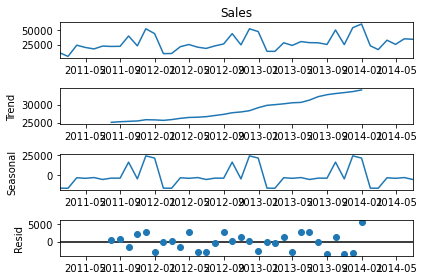

In [39]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Sales).plot()
result = sm.tsa.stattools.adfuller(train.Sales)
plt.show()

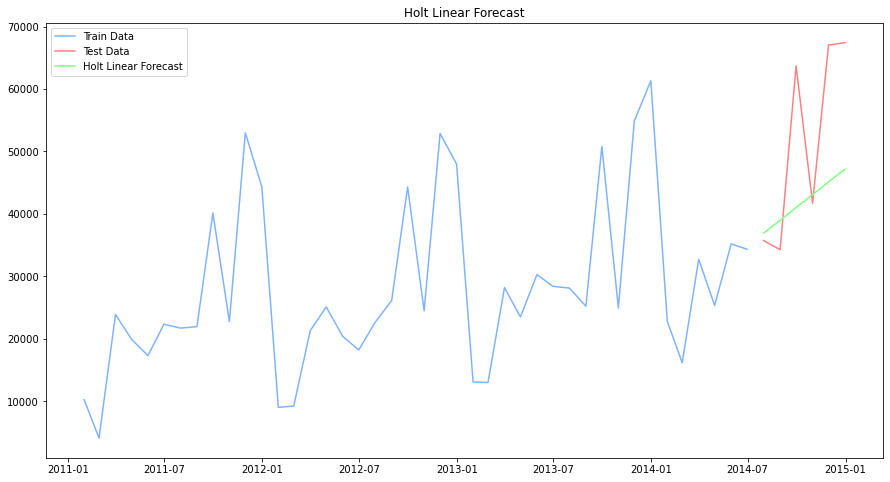

In [40]:
y_forecast_holtlin = test.copy()
fit2 = Holt(np.asarray(train['Sales'])).fit(smoothing_level = 0.9,smoothing_slope = 0.7)
y_forecast_holtlin['Holt_linear'] = fit2.forecast(len(test))
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_holtlin.index,y_forecast_holtlin['Holt_linear'], color='#80ff80', label='Holt Linear Forecast')
plt.legend(loc='best')
plt.title("Holt Linear Forecast")
plt.show()

In [41]:
rmse6 = sqrt(mean_squared_error(test.Sales, y_forecast_holtlin.Holt_linear))
print("The root mean squared error for Holt Linear Forecast is: ",rmse6)

The root mean squared error for Holt Linear Forecast is:  15428.546131782603


### Holt Winters Method

Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality. As we can see in cell 39 this data also has seasonality.
The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such technique that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

C:\Users\saburla\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


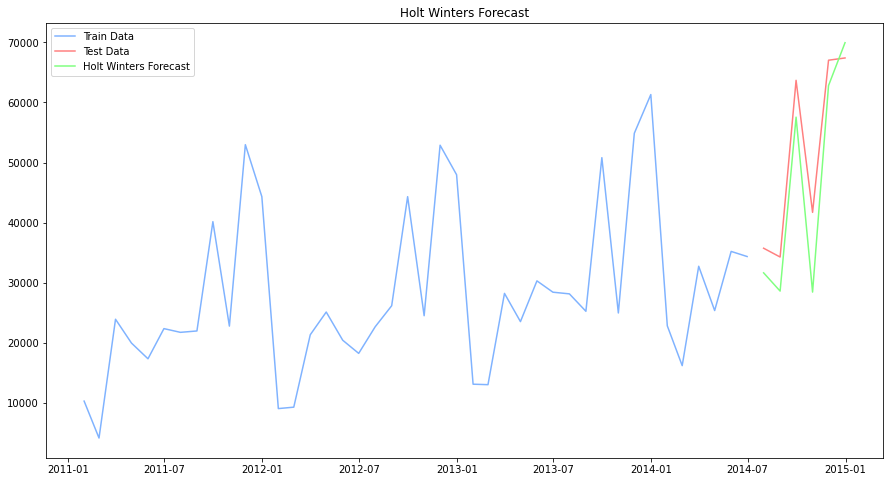

In [42]:
y_forecast_holtwin = test.copy()
fit3 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='mul', seasonal='mul').fit()
y_forecast_holtwin['Holt_winter'] = fit3.forecast(len(test))
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Sales'], color='#80b3ff', label='Train Data')
plt.plot(test.index,test['Sales'], color='#ff8080', label='Test Data')
plt.plot(y_forecast_holtwin.index,y_forecast_holtwin['Holt_winter'], color='#80ff80', label='Holt Winters Forecast')
plt.legend(loc='best')
plt.title("Holt Winters Forecast")
plt.show()

In [43]:
rmse7 = sqrt(mean_squared_error(test.Sales, y_forecast_holtwin.Holt_winter))
print("The root mean squared error for Holt Winters Forecast is: ",rmse7)

The root mean squared error for Holt Winters Forecast is:  6916.2650269284195


### SARIMAX

Another common Time series model that is very popular among the Data scientists is SARIMA. It stand for Seasonal Autoregressive Integrated Moving average. While exponential smoothing models were based on a description of trend and seasonality in the data, SARIMA models aim to describe the correlations in the data with each other. It also takes into account the seasonality of dataset just like Holt’ Winter method.

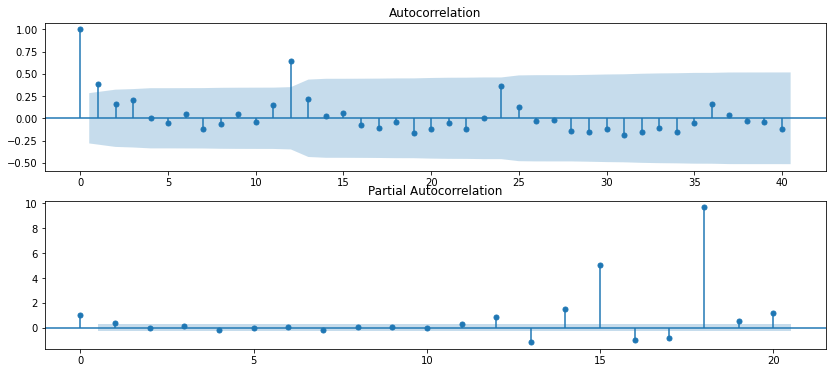

In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(newdf['Sales'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(newdf['Sales'].dropna(),lags=20,ax=ax2)

The model's notation is SARIMA(p, d, q) (P, D, Q)lag. These three parameters account for seasonality, trend, and noise in data. We will use the AIC (Akaike information criterion) indicator which is an estimator of the relative quality of statistical models. The lower the AIC value the better. After performing multiple iterations, the model suggests that SARIMAX(2, 1, 4)x(2, 1, 4, 12) with AIC value of 710 is the best combination. We can also see that AIC and BIC values are in agreement which is a good sign.

In [45]:
model = sm.tsa.SARIMAX(newdf['Sales'], order=(2, 1, 4), seasonal_order=(2, 1, 4, 12))
best_model = model.fit(dis=-1)
print(best_model.summary())

C:\Users\saburla\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 1, 4)x(2, 1, 4, 12)   Log Likelihood                -342.301
Date:                            Wed, 23 Mar 2022   AIC                            710.601
Time:                                    12:59:44   BIC                            730.821
Sample:                                01-31-2011   HQIC                           717.581
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1277      0.809      0.158      0.875      -1.459       1.714
ar.L2         -0.9624      0.468   

We can also evaluate our model with the following:
    
1. Prob(Q) - 0.3>0.05, This means that our residuals are not correlated.
2. Prob(JB) - 0.74>0.05, This means that residuals are normally distributed.

Which both indicate that the model is doing good.

As we can see in the below graph the forecast is following closely on the test data which shows our model is working well visually.

<AxesSubplot:xlabel='Order_Date'>

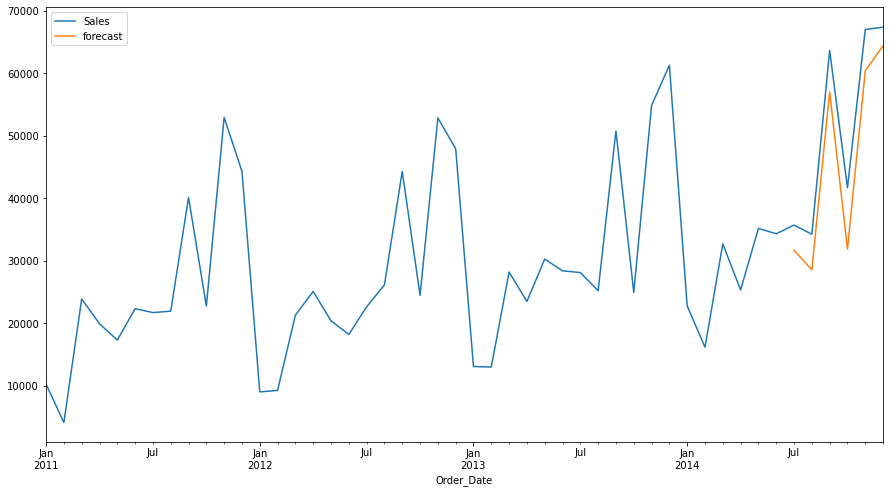

In [46]:
forecast = best_model.predict(start = 42, end = 47, dynamic = True)
newdf['forecast'] = best_model.predict(start = 42, end = 47, dynamic = True)
newdf[['Sales','forecast']].plot(figsize=(15,8))

In [47]:
import joblib
joblib.dump(best_model, 'timeSeries.pkl')

['timeSeries.pkl']

In [48]:
rmse8 = sqrt(mean_squared_error(test.Sales, forecast))
print("The root mean squared error for SARIMAX Forecast is: ",rmse8)

The root mean squared error for SARIMAX Forecast is:  6350.601226576447


### Comparison Of all the Tried Models Using the RMSE Values

In [49]:
l1 = []
l1 = l1 + [rmse1] + [rmse2] + [rmse3] + [rmse4] + [rmse5] + [rmse6] + [rmse7] + [rmse8]
l1

[22652.087438060003,
 27881.731070943864,
 21522.676243218528,
 14681.000722123013,
 22637.73861247026,
 15428.546131782603,
 6916.2650269284195,
 6350.601226576447]

In [50]:
l2 = ['Naive', 'Simple Avg', 'Moving Avg', 'Weighted MovAvg', 'Exp Smoothing', 'Holt Lin', 'Holt Win', 'SARIMAX']
l2

['Naive',
 'Simple Avg',
 'Moving Avg',
 'Weighted MovAvg',
 'Exp Smoothing',
 'Holt Lin',
 'Holt Win',
 'SARIMAX']

In [51]:
rmsedf = pd.DataFrame({
    'Method': l2,
    'RMSE Val': l1
})
rmsedf

,Method,RMSE Val
0,Naive,22652.087438
1,Simple Avg,27881.731071
2,Moving Avg,21522.676243
3,Weighted MovAvg,14681.000722
4,Exp Smoothing,22637.738612
5,Holt Lin,15428.546132
6,Holt Win,6916.265027
7,SARIMAX,6350.601227


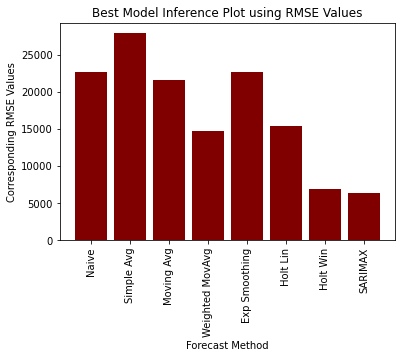

In [52]:
plt.bar(rmsedf['Method'], rmsedf['RMSE Val'], color='maroon')
plt.xticks(rotation=90)
plt.xlabel("Forecast Method")
plt.ylabel("Corresponding RMSE Values")
plt.title("Best Model Inference Plot using RMSE Values")
plt.show()

The graph above proves us that SARIMAX is the best performing model in all the models built as lower the rmse value better the model.

### Diagnosting SARIMAX Model Further

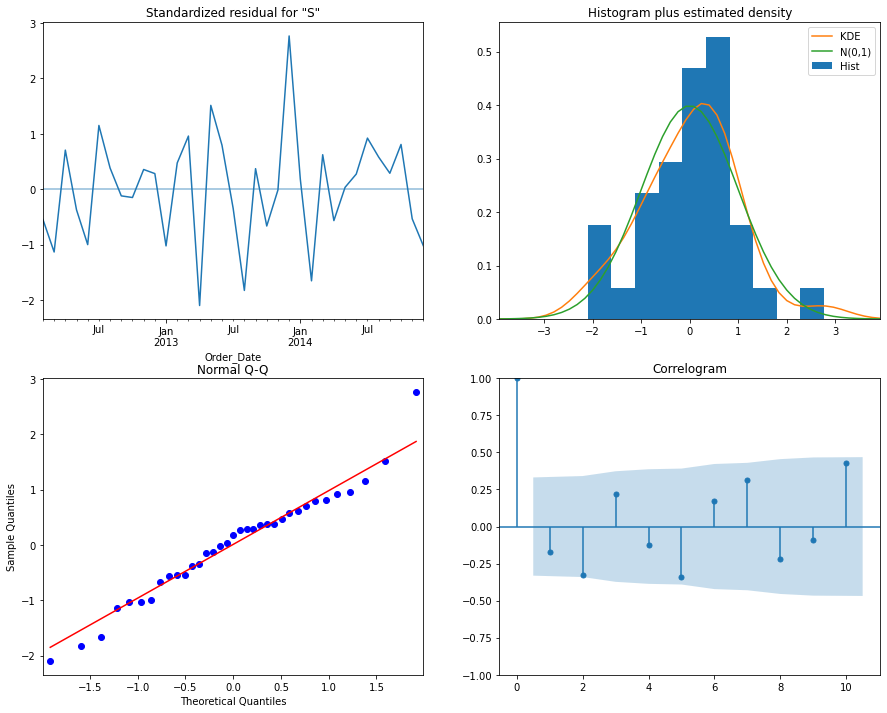

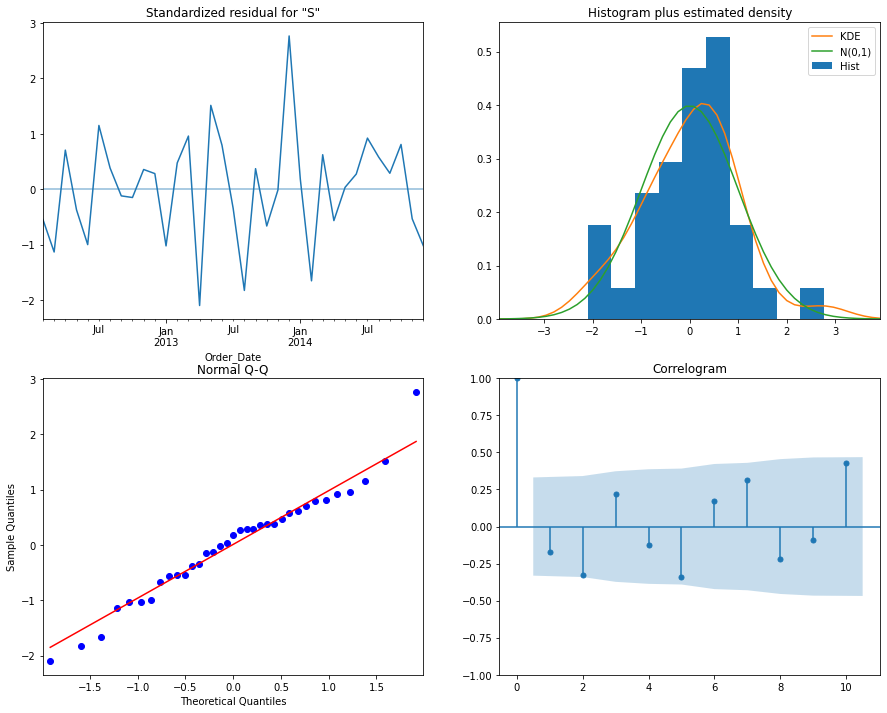

In [53]:
best_model.plot_diagnostics(figsize=(15,12))

Let us analyse the above plots:

1. Standardized Residual - There are no obvious patterns in the residuals which inturn points out to a good model.
2. Histogram plus Estimated Density - The histogram shows measured distribution of the residuals while orange line shows the KDE curve. The green line shows a normal distribution. For a good model the orange line should be similar to green line which in this case it is almost similar.
3. Correlogram - 95% of the correlations for lag grater than one should not be significant. We can conclude its a good model.
4. Normal Q-Q - Most of data points should lie on the straight line, indicating normal distribution of the residuals. This mostly is the case here.

Overall the model is doing well even with respect to the plot diagnostics.

### Forecasting for the years 2015, 2016, 2017, 2018, 2019

In [54]:
dffin = newdf.reset_index()
dffin

,Order_Date,Sales,forecast
0,2011-01-31,10274.9510,NaN
1,2011-02-28,4127.0440,NaN
2,2011-03-31,23906.6560,NaN
3,2011-04-30,19937.9230,NaN
4,2011-05-31,17323.6010,NaN
5,2011-06-30,22346.2346,NaN
6,2011-07-31,21725.1150,NaN
7,2011-08-31,21955.2065,NaN
8,2011-09-30,40155.5168,NaN
9,2011-10-31,22765.1810,NaN


In [62]:
forecast_values = best_model.get_forecast(steps = 60)
print(forecast_values)

In [ ]:
forecast_ci = forecast_values.conf_int()
ax = dffin.plot(x='Order_Date', y='Sales', figsize = (16, 6), legend = True, color='purple')
forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (16, 6), grid=True)
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='pink', alpha = .5)
plt.title('Sales Forecast', size = 16)
plt.ylabel('Sales', size=12)
plt.legend(loc='upper left', prop={'size': 12})
ax.axes.get_xaxis().set_visible(True)
ax.text(540, 400, 'Forecasted Values Until 2019', fontsize=12,  color='black')
plt.show()

In [59]:
def forecast(n):
    forecast_values = best_model.get_forecast(steps = n)
    
    forecast_ci = forecast_values.conf_int()
    ax = dffin.plot(x='Order_Date', y='Sales', figsize = (16, 6), legend = True, color='purple')
    forecast_values.predicted_mean.plot(ax=ax, label='Forecast', figsize = (16, 6), grid=True)
    ax.fill_between(forecast_ci.index,
                    forecast_ci.iloc[: , 0],
                    forecast_ci.iloc[: , 1], color='pink', alpha = .5)
    plt.title('Sales Forecast', size = 16)
    plt.ylabel('Sales', size=12)
    plt.legend(loc='upper left', prop={'size': 12})
    ax.axes.get_xaxis().set_visible(True)
    ax.text(540, 400, 'Forecasted Values', fontsize=12,  color='black')
    plt.savefig('forecast1.png')

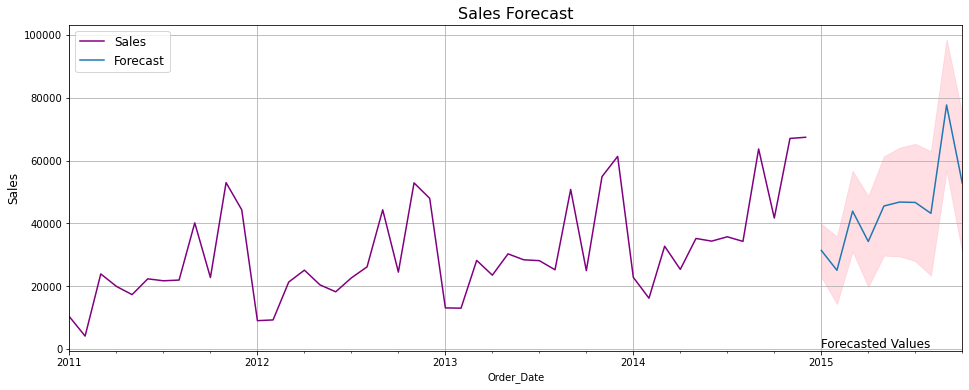

In [60]:
forecast(10)

As we can observe from the forecast graph above our SARIMAX model is keeping up the trend and seasonality of the data and giving us a good forecast overall.

#### Issues about the data and how to overcome the same

- The outliers in the data were really extreme and treating them was a necessary step as otherwise the model we build would have a lot of trouble learning it and can learn to forecast it the wrong way. Since the outliers were on a complete extreme end in sales we capped them to the 90th percentile value of the data so we have the fact that they are going extreme but also are able to tone the fluctuations down to a good amount.
- The next was when the data was aggregated into daily records we coudnt find a clear cut pattern as to how to go about the problem. So we ended up aggregating them to weekly but that didnt yield good results as well. So finally we ended up aggregating the data monthly which yielded the results you can currently see in the notebook. So this shows that we need to try out multiple approaches with the data before we end up with decent results.

#### Pointers for the Sales Team

- First and the foremost would be to check if the data given is stationary or not. Incase it isnt none of the above models would do well on the data. So it is important that the data is stationary.
- Deciding which model to go with is the next important step. For deciding you should check for trend seasonality in your data. Each model is built for a different purpose so with the description of each of the models given above you can choose the correct model for your data.
- Always try out multiple models so you can check which model is giving you the best forecast for your data.
- If a model has parameters that are supposed to be input from your end try out multiple values and compare how the model is doing with each set of values.
- Always check multiple factors for models before you finalise it for example: check rmse value, use plot_diagnostics for visual analysis, and finally also use summary() for additional parameters to confirm that your model is working well. 
- Once you have your final model try to forecast for the future and plot a graph to see if everything is coming out as it should. While doing this step dont forget to include confidence intervals.    
 
By following the above steps we can get better forecast for any data.

#### Summary of the Task 2.4

- We started off the notebook by aggregating the data with respect to months in the date column.
- We then tried out various Forecasting models to check which one is giving us the best forecast. 
- We confirmed if the model is working well with the help of rmse value(lower the value better the model).
- We also plotted graphs for each model as well as a comparison graph for all the models rmse values.
- We used plot_diagnostics() function to further strengthen our understanding of weather the final model we chose is a good model or not which in this case showed it was a good model.
- We also plotted a forecast graph that shows forecasted values for years 2015, 2016, 2017, 2018 and 2019.
- We conclude by picking SARIMAX as the final model that did well for this capstone project.